# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 5

Do wykonania laboratorium można skorzystać z bibliotek/modułów:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)
- [pandas](https://pandas.pydata.org/)
- [collections](https://docs.python.org/3/library/collections.html)


### Zadanie 1

Wczytaj plik `english.10MB`
> Podpowiedź: Kodowanie `iso-8859-1`



In [3]:
import string
with open('english.10MB', encoding='iso-8859-1') as f:
    lines = f.readlines()
fixed = []
for i in lines:
    new = i.replace('\n', ' ')
    if len(new) > 1:
        fixed.append(new)
fixed

['This etext was produced by Normal Wolcott. ',
 'Ten Days that Shook the World ',
 'by John Reed ',
 "[Redactor's Note: This document uses the ISO 8891-1 Latin1 character ",
 'set (Windows). The book is composed of text, footnotes, and appendices. ',
 'The footnotes are included at the end of each chapter, while the ',
 'Appendix No. and Section are referred to in the text in parentheses, ',
 'the Appendices following the book text. Liberal use is made of italics, ',
 'and these have been indicated by bracketing italic text with the ',
 'underscore character "_".  Line length is 70-72 characters. A number of ',
 'graphics occur in the text, these are referred to by number as ',
 '"Graphic", etc. The Figures themselves are in a separate file. To ',
 'facilitate conversion to a word-processing format, an attempt has been ',
 'made to end each line with a space. ',
 'Graphics: There are 17 graphic figures in the text. These are indicated ',
 'by a reference to the page number in the orig

### Zadanie 2
Zamień wszystkie litery na małe.


In [21]:
for i in range(len(fixed)):
    fixed[i] = fixed[i].lower()
fixed

['this etext was produced by normal wolcott. ',
 'ten days that shook the world ',
 'by john reed ',
 "[redactor's note: this document uses the iso 8891-1 latin1 character ",
 'set (windows). the book is composed of text, footnotes, and appendices. ',
 'the footnotes are included at the end of each chapter, while the ',
 'appendix no. and section are referred to in the text in parentheses, ',
 'the appendices following the book text. liberal use is made of italics, ',
 'and these have been indicated by bracketing italic text with the ',
 'underscore character "_".  line length is 70-72 characters. a number of ',
 'graphics occur in the text, these are referred to by number as ',
 '"graphic", etc. the figures themselves are in a separate file. to ',
 'facilitate conversion to a word-processing format, an attempt has been ',
 'made to end each line with a space. ',
 'graphics: there are 17 graphic figures in the text. these are indicated ',
 'by a reference to the page number in the orig

### Zadanie 3
Znajdź unikalne litery (pomiń inne znaki) w tekście i dla każdej przypisz liczbę wystąpień, a następnie wyświetl histogram.

Pytanie: Jaka litera występuje najczęściej?

> Podpowiedź: `import string`


In [22]:
dir(string)
dict_for_hist = {}
for i in string.ascii_lowercase:
    occurences = 0
    for j in fixed:
        occurences += j.count(i)
    dict_for_hist[i] = occurences
dict_for_hist

{'a': 687143,
 'b': 116039,
 'c': 171074,
 'd': 391087,
 'e': 1001102,
 'f': 190105,
 'g': 149672,
 'h': 590005,
 'i': 532158,
 'j': 12678,
 'k': 71097,
 'l': 311298,
 'm': 211476,
 'n': 562896,
 'o': 569730,
 'p': 124510,
 'q': 8304,
 'r': 453054,
 's': 494323,
 't': 713888,
 'u': 203343,
 'v': 70530,
 'w': 191303,
 'x': 9636,
 'y': 141607,
 'z': 11132}

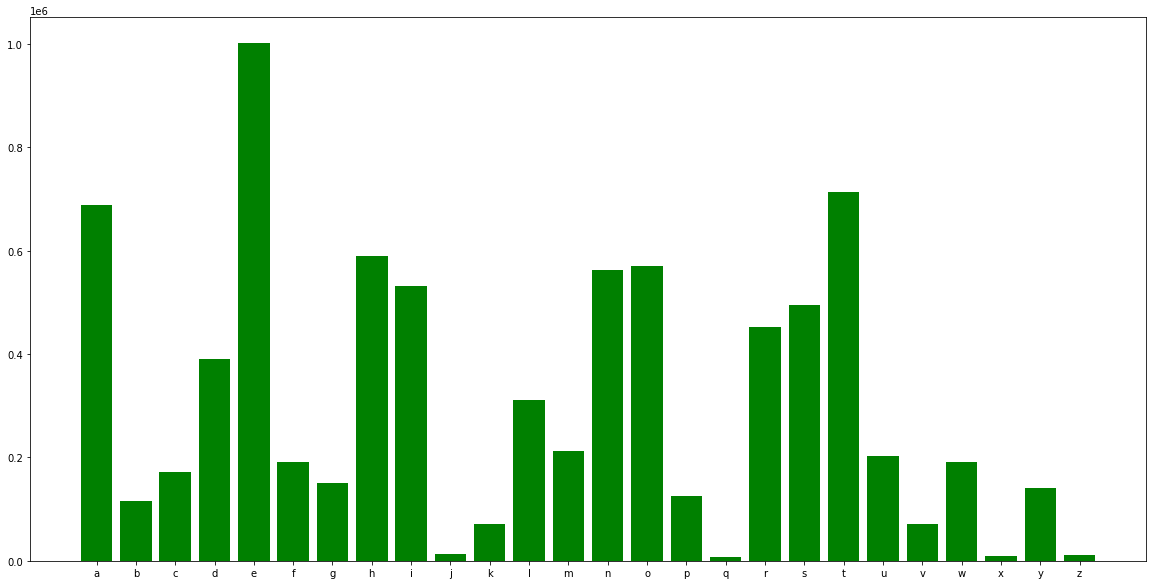

In [23]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(dict_for_hist.keys(), dict_for_hist.values(), color='g')
plt.show()

### Zadanie 4

Napisz funkcję, która dla podanego prefiksu (ciąg liter, np. `th` to prefiks o długości 2) zwróci listę maksymalnie pięciu liter, które mają największe prawdopodobieństwo wystąpienia po nim.

```python
In : nast('th', s) # th - prefiks, s - tekst
Out: ['e', 'a', 'i', 'o', 'y']
```



In [67]:
import re

def nast(prefix, s):

    dict_for_hist = {}
    for i in string.ascii_lowercase:
        for j in s:
            letter = 0
            index = [m.start() for m in re.finditer(prefix, j)]
            for k in index:
                try:
                    letter = j[k+len(prefix)]
                except:
                    pass

                if letter == i:
                    try:
                        dict_for_hist[i] += 1
                    except KeyError:
                        dict_for_hist[i] = 1

    most_common = {k: v for k, v in sorted(dict_for_hist.items(), key=lambda item: item[1], reverse=True)}
    most_common = list(most_common.keys())
    most_common = most_common[0:5]
    return most_common

In [25]:
a = nast('th', fixed)
print(f'The most common occurring letters after "th" are: {a}')

The most common occurring letters after "th" are: ['e', 'a', 'i', 'o', 'y']


### Zadanie 5

Napisz kod, który wczytuje kolejne znaki od użytkownika i podpowiada następne możliwe litery (maksymalnie pięć). Wykorzystaj funkcję zaimplementowaną w poprzednim zadaniu.
> Podpowiedź: Możesz wykorzystać funkcję `input()` do wczytywania znaków.

Przykład działania:
```
Nacisnij <ENTER> aby zakonczyc.
Podaj litere: f
Podaj kolejną literę (możliwe: ['o', 'a', 'r', 'e', 'i']): fo
Podaj kolejną literę (możliwe: ['r', 'u', 'l', 'o', 'x']): for
Podaj kolejną literę (możliwe: ['e', 't', 'm', 'g', 'c']): fore
Podaj kolejną literę (możliwe: ['s', 'h', 'i', 'g', 'v']): fores
Podaj kolejną literę (możliwe: ['t', 'a', 'e', 'i', 'k']): forest
Podaj kolejną literę (możliwe: ['s', 'a']): forests
```

In [69]:
def predict_letters(s):
    letter = input('Pick your first letter')
    word = [letter]
    for i in range(10):
        next_possible = nast("".join(word), s)
        next_letter = input(f'Your word so far is: {"".join(word)} \n Pick next letter from the possibilities: {next_possible}')
        word.append(next_letter)
    print(f'Your final word is: {"".join(word)}')

predict_letters(fixed)

KeyboardInterrupt: 

### Zadanie 6

Wykonaj zadanie podobne do zad. 6, ale na poziomie słów. Dla ułatwienia słowa można wybierać z listy za pomocą liczb 1-5.

In [114]:
def next_word(word, s):

    dict_for_hist = {}
    list_of_next_words = []

    for j in range(len(s)):
        splitted_verse = s[j].split(word)

        try:
            if len(splitted_verse) >= 2:
                for i in range(1, len(splitted_verse)):
                    splitted_verse = splitted_verse[i].split()
                    list_of_next_words.append(splitted_verse[0])

        except IndexError:
            splitted_verse = s[j+1].split()
            list_of_next_words.append(splitted_verse[0])



    for word in list_of_next_words:
        if (word in dict_for_hist):
            dict_for_hist[word] += 1
        else:
            dict_for_hist[word] = 1

    most_common = {k: v for k, v in sorted(dict_for_hist.items(), key=lambda item: item[1], reverse=True)}
    most_common = list(most_common.keys())
    most_common = most_common[0:5]
    return most_common


def predict_words(s):
    input_word = input('Type in a random word') + str(' ')
    sentence = [input_word]
    for i in range(10):
        next_possible = next_word("".join(sentence), s)
        next_chosen_word = input(f'Your word so far is: {"".join(sentence)} \n Type index number for a word from the possibilities: {next_possible}')
        try:
            next_chosen_word = int(next_chosen_word)
        except:
            next_chosen_word = next_chosen_word + str(' ')
            sentence.append(next_chosen_word)

        if type(next_chosen_word) is int:
            if next_chosen_word > (len(next_possible)-1):
                try:
                    sentence.append(next_possible[-1] + str(' '))
                except:
                    break
            else:
                sentence.append(next_possible[next_chosen_word] + str(' '))

    print(f'Your final sentence is: {"".join(sentence)}')

In [95]:
for i in range(len(fixed)):
    fixed[i] = re.sub(r'[^\x00-\x7f]',r'', fixed[i]) # fixing weird characters

In [115]:
predict_words(fixed)

Your final sentence is: subtle as aureole round a shadow's head, cast 
